In [3]:
!pip install openpyxl
!pip install xlsxwriter

In [4]:
import requests
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Set column width to 400
pd.set_option('display.max_colwidth', 400)

# Rows
#pd.set_option('display.max_rows', 100)

In [5]:
# Replace 'your-api-key' with your actual OpenAI API key
api_key = 'sk-proj-AAyMKLL6T1yIp53XJRPST3BlbkFJ9mTYSHpESQ4ijgm90mug'

# Define the headers
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {api_key}'
}

rubric = "Correctness (30%): This is the most critical aspect. The answer must be correct to earn a high score. Incorrect answers would score low, regardless of the other qualities.Completeness (25%): This measures whether all necessary steps and explanations are included. Partial answers or those missing critical details would score lower.Efficiency (20%): This assesses whether the solution is achieved through an efficient method, avoiding unnecessarily complicated steps. Solutions that are correct and complete but cumbersome could lose some points here.Clarity (15%): This evaluates how easy it is to understand the solution. Clear, well-organized answers would score highly, while confusing or poorly structured responses would score lower. Style (10%): The code must be clean and well-commented"

# Functions

In [6]:
def fetch_solution_35(question):
    '''Function to fetch the solution for a question using GPT-3.5 with intermediate steps'''
    
    data = {
        'model': 'gpt-3.5-turbo',
        'messages': [
            {"role": "system", "content": "You are a helpful assistant. Provide a detailed solution to the math problem, including all intermediate steps."},
            {"role": "user", "content": question}
        ],
        'max_tokens': 400,
        'temperature': 0
    }
    response = requests.post('https://api.openai.com/v1/chat/completions', headers=headers, json=data)
    result = response.json()
    return result['choices'][0]['message']['content'].strip()


def fetch_solution_4(question):
    '''Function to fetch the solution for a question using GPT-4 with intermediate steps'''
    
    data = {
        'model': 'gpt-4',
        'messages': [
            {"role": "system", "content": "You are a helpful assistant. Provide a detailed solution to the math problem, including all intermediate steps"},
            {"role": "user", "content": question}
        ],
        'max_tokens': 400,
        'temperature': 0
    }
    response = requests.post('https://api.openai.com/v1/chat/completions', headers=headers, json=data)
    result = response.json()
    return result['choices'][0]['message']['content'].strip()

def fetch_solution_4_ques(question):
    '''Function to fetch the solution for a question using GPT-4 with intermediate steps'''
    
    data = {
        'model': 'gpt-4',
        'messages': [
            {"role": "system", "content": "You are a helpful assistant. Provide only a decimal grade from 0 to 10 to the math problem's solution. 10 being the best, 0 being the worst."},
            {"role": "user", "content": question}
        ],
        'max_tokens': 400,
        'temperature': 0,
        'top_p': 1.0
    }
    response = requests.post('https://api.openai.com/v1/chat/completions', headers=headers, json=data)
    result = response.json()
    return result['choices'][0]['message']['content'].strip()

# Converting json to df and storing gpt 3.5 and 4 solutions to df

## Making .xlsx files for all types

In [5]:
# Base directory where all folders are stored
base_directory = 'Data/MATH/test'
solution_directory = 'Data/MATH/solution'

# Dictionary to hold dataframes for each subject
dataframes = {}

# Iterate over each subdirectory in the base directory
for subdir in os.listdir(base_directory):
    subdir_path = os.path.join(base_directory, subdir)
    if os.path.isdir(subdir_path):  # Make sure it's a directory
        print(subdir_path)
        new_df = pd.DataFrame()  # Initialize a new dataframe for each folder

        # Iterate over each file in the subdirectory
        for filename in os.listdir(subdir_path):
            if filename.endswith('62.json'):  # Check for specific file type
                filepath = os.path.join(subdir_path, filename)
                with open(filepath, 'r') as file:
                    data = json.load(file)
                    df = pd.DataFrame([data])
                    new_df = pd.concat([new_df, df], ignore_index=True)
                    
        # Add GPT 3.5 and 4 solutions
        new_df['gpt3.5_solution'] = new_df['problem'].apply(fetch_solution_35)
        new_df['gpt4_solution'] = new_df['problem'].apply(fetch_solution_4)
        
        # Store the dataframe in the dictionary with the folder name as the key
        dataframes[subdir] = new_df
        
    # Create Excel for each type
    for key, df in dataframes.items():
        save_path = f'{solution_directory}/{key}_modified.xlsx'
        df.rename(columns={'solution': 'kaggle_solution'}, inplace=True) # New
        new_df.to_excel(save_path, index=False, engine='openpyxl')
        #new_df.to_csv(save_path)
        

Data/MATH/test/counting_and_probability
Data/MATH/test/intermediate_algebra



KeyboardInterrupt



## Making files for Algebra questions and getting Kaggle and GPT-3.5 Scoring

In [10]:
%%time
# Testing Copy

# Base directory where all folders are stored
base_directory = 'Data/MATH/test'
solution_directory = 'Data/MATH/solution'

# Dictionary to hold dataframes for each subject
dataframes = {}

# Iterate over each subdirectory in the base directory
for subdir in os.listdir(base_directory):
    subdir_path = os.path.join(base_directory, subdir)
    if os.path.isdir(subdir_path) and subdir.startswith("a"):  # Make sure it's a directory
        print(subdir_path)
        new_df = pd.DataFrame()  # Initialize a new dataframe for each folder

        # Iterate over each file in the subdirectory
        for filename in os.listdir(subdir_path):
            if filename.endswith('62.json'):  # Check for specific file type
                filepath = os.path.join(subdir_path, filename)
                with open(filepath, 'r') as file:
                    data = json.load(file)
                    df = pd.DataFrame([data])
                    new_df = pd.concat([new_df, df], ignore_index=True)
        
        # Add GPT 3.5 and 4 solutions
        new_df['gpt3.5_solution'] = new_df['problem'].apply(fetch_solution_35)
        new_df['gpt4_solution'] = new_df['problem'].apply(fetch_solution_4)
        
        #Sort and Rename
        new_df.rename(columns={'solution': 'kaggle_solution'}, inplace=True)
        new_df['temp_sort'] = new_df['level'].str.extract('(\d+)').astype(int)
        new_df.sort_values('temp_sort', inplace=True)
        new_df.drop('temp_sort', axis=1, inplace=True)
        
        #Create Column with question, solution, rubric
        new_df['temp'] = "Problem:" + new_df['problem'] + "Kaggle Solution:" + new_df['kaggle_solution'] + " Rubric:" + rubric
        new_df['kaggle_score'] = new_df['temp'].apply(fetch_solution_4_ques)
        new_df['temp'] = "Problem:" + new_df['problem'] + "GPT3.5 Solution:" + new_df['gpt3.5_solution'] + " Rubric:" + rubric
        new_df['gpt3.5_score'] = new_df['temp'].apply(fetch_solution_4_ques)
        #new_df['temp'] = "Problem:" + new_df['problem'] + "GPT4 Solution:" + new_df['gpt4_solution'] + " Rubric:" + rubric
        #new_df['gpt4_score'] = new_df['temp'].apply(fetch_solution_4_ques)
        new_df.drop('temp', axis=1, inplace=True)
        
        # Rearrange so 'City' is the first column
        new_order = ['problem', 'level', 'type', 'kaggle_solution', 'kaggle_score', 'gpt3.5_solution', 'gpt3.5_score', 'gpt4_solution']
        new_df = new_df[new_order]

        # Store the dataframe in the dictionary with the folder name as the key
        dataframes[subdir] = new_df
        
        
    # Create Excel for each type
    for key, df in dataframes.items():
        save_path = f'{solution_directory}/{key}_modified.xlsx'
        df.to_excel(save_path, index=False, engine='openpyxl')
        #new_df.to_csv(save_path)
         
 

Data/MATH/test/algebra
CPU times: user 1.25 s, sys: 219 ms, total: 1.47 s
Wall time: 3min 37s


# Creating Plot

In [11]:
# Convert 'score' from string to integer
df['kaggle_score'] = df['kaggle_score'].astype(float)
df['gpt3.5_score'] = df['gpt3.5_score'].astype(float)

# Group by 'level', calculate the mean of 'score', and create a new DataFrame
grouped_df = df.groupby('level')[['kaggle_score', 'gpt3.5_score']].mean().reset_index()

# Rename the column for clarity
grouped_df.rename(columns={'kaggle_score': 'kaggle_average_score', 'gpt3.5_score': 'gpt3.5_average_score'}, inplace=True)

grouped_df

,level,kaggle_average_score,gpt3.5_average_score
0,Level 1,9.500000,9.5
1,Level 2,9.833333,10.0
2,Level 3,9.000000,10.0
3,Level 4,9.600000,9.0
4,Level 5,9.500000,10.0


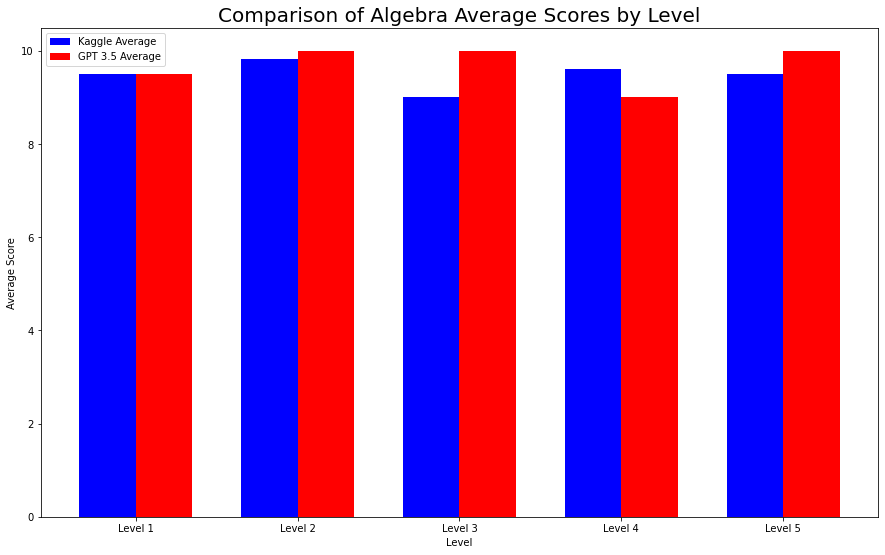

In [23]:
# Assuming df is already correctly grouped by 'level' and averaged
fig, ax = plt.subplots(figsize=(15, 9))
bar_width = 0.35

# Positions of the bar groups
index = range(len(grouped_df['level']))

# Creating the bars
bar1 = ax.bar(index, grouped_df['kaggle_average_score'], bar_width, label='Kaggle Average', color='blue')
bar2 = ax.bar([p + bar_width for p in index], grouped_df['gpt3.5_average_score'], bar_width, label='GPT 3.5 Average', color='red')

# Adding features to the plot
ax.set_xlabel('Level')
ax.set_ylabel('Average Score')
ax.set_title('Comparison of Algebra Average Scores by Level', fontsize=20)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(grouped_df['level'])
ax.legend()

# Show the plot
plt.show()